In [14]:
import pandas as pd
csv_file = pd.read_csv('final-result.csv', index_col=False)
featurues = ['accessed_file','recvsaction_android.intent.action.UMS_DISCONNECTED','recvsaction_android.intent.action.ACTION_POWER_CONNECTED',
             'recvsaction_android.intent.action.ACTION_SHUTDOWN','recvsaction_android.provider.Telephony.SMS_RECEIVED',
             'recvsaction_android.intent.action.SIG_STR','recvsaction_com.android.vending.INSTALL_REFERRER',
             'recvsaction_android.intent.action.NEW_OUTGOING_CALL','recvsaction_android.provider.Telephony.WAP_PUSH_RECEIVED',
             'recvsaction_android.intent.action.BOOT_COMPLETED','recvsaction_android.intent.action.PHONE_STATE',
             'recvsaction_android.intent.action.PACKAGE_REMOVED','recvsaction_android.intent.action.USER_PRESENT',
             'data_leaks_count','tag_count','servicestart_found_com.android.mms.transaction.SmsReceiverService',
             'servicestart_found_com.android.contacts.ViewNotificationService','servicestart_found_com.android.battery.BridgeProvider',
             'servicestart_found_com.safetest.tractor.UpdateService','servicestart_found_com.android.providers.downloads.DownloadService',
             'servicestart_found_com.android.contacts.calllog.CallLogNotificationsService','servicestart_found_com.safetest.five.SoundService',
             'servicestart_found_com.geinimi.custom.GoogleKeyboard','tag_name_TAINT_LOCATION','tag_name_TAINT_CONTACTS','tag_name_TAINT_MIC',
             'tag_name_TAINT_PHONE_NUMBER','tag_name_TAINT_LOCATION_GPS','tag_name_TAINT_LOCATION_NET','tag_name_TAINT_LOCATION_LAST',
             'tag_name_TAINT_CAMERA','tag_name_TAINT_ACCELEROMETER','tag_name_TAINT_SMS','tag_name_TAINT_IMEI','tag_name_TAINT_IMSI',
             'tag_name_TAINT_ICCID','tag_name_TAINT_DEVICE_SN','tag_name_TAINT_ACCOUNT','tag_name_TAINT_BROWSER','tag_name_TAINT_OTHERDB',
             'tag_name_TAINT_FILECONTENT','tag_name_TAINT_PACKAGE','tag_name_TAINT_CALL_LOG','tag_name_TAINT_EMAIL','tag_name_TAINT_CALENDAR',
             'tag_name_TAINT_SETTINGS','fdaccess_pipe','fdaccess_cmdline','fdaccess_shared_prefs','fdaccess_dat','fdaccess_sdcard','fdaccess_info',
             'fdaccess_jar','fdaccess_db','fdaccess_txt','fdaccess_urandom','fdaccess_if_inet6','phonecalls','sendsms']
X = csv_file[featurues]
Y = csv_file.label

In [15]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

<h3>Classification Accuracy: Percentage of correct prediction</h3>

In [16]:
from sklearn.svm import SVC

C = 1.0  # SVM regularization parameter
svc = SVC(C=C, kernel='linear', probability=True).fit(x_train,y_train)
y_predict = svc.predict(x_test)

In [17]:
from sklearn import metrics
print metrics.accuracy_score(y_predict, y_test)

0.907294832827


### Null Accuracy: accuracy that could be achieved by always predicting the most frequent class

In [18]:
# calculate percentage of 1
y_test.mean()

0.4726443768996961

In [19]:
#calculate percentage of 0
print 1-y_test.mean()

0.5273556231


In [20]:
# Null Accuracy
max(y_test.mean(),1-y_test.mean())

0.5273556231003039

### compare <strong>true</strong> and <strong>predict</strong> response values

In [21]:
print 'True : ', y_test[0:29]
print 'Pred : ', y_predict[0:29]

True :  92      1
1655    0
1376    0
1936    0
2221    0
2311    0
2094    0
2576    0
2595    0
2398    0
224     1
1211    1
2460    0
53      1
746     1
276     1
1012    1
2255    0
878     1
2577    0
1385    0
2532    0
2434    0
306     1
2420    0
634     1
2145    0
192     1
2194    0
Name: label, dtype: int64
Pred :  [1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0]


### Confusion Matrix

In [22]:
confusion_matrics = metrics.confusion_matrix(y_test, y_predict)
print confusion_matrics
TP = confusion_matrics[1,1]
TN = confusion_matrics[1,0]
FP = confusion_matrics[0,1]
FN = confusion_matrics[1,0]

[[326  21]
 [ 40 271]]


## Metrics computed from computed matrix <h4>Classification Accuracy: Overall, how often is classifier correct</h4>

In [23]:
print (TP+TN)/float(TP+TN+FP+FN)
print metrics.accuracy_score(y_test, y_predict)

0.836021505376
0.907294832827


<h4>Classification Error: Overall, how often is classifier incorrect?</h4>

In [24]:
print (FP+FN)/float(TP+TN+FP+FN)
print 1- metrics.accuracy_score(y_test, y_predict)

0.163978494624
0.0927051671733


<h4>False Positive Rate</h4>

In [25]:
print FP/float(TN +FP)

0.344262295082


<h4>True Positive Rate</h4>

In [26]:
print TP/float(TN +FP)

4.44262295082


<h4>Precision Score</h4>

In [27]:
print TP/float(TP +FP)
print metrics.precision_score(y_test, y_predict)

0.928082191781
0.928082191781


# Adjusting the Classification Threshold

In [31]:
print svc.predict(x_test)[0:20]

[1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0]


In [32]:
# print the first 10 predicated probabilities
svc.predict_proba(x_test)[0:20,1]

array([ 0.98928246,  0.22344143,  0.01039258,  0.22344143,  0.0103934 ,
        0.68176216,  0.22344143,  0.22344143,  0.0103934 ,  0.22344143,
        0.88857259,  0.99998359,  0.0103934 ,  0.88856665,  0.89763075,
        0.9954821 ,  0.99548143,  0.0103934 ,  0.99548211,  0.0103934 ])

In [34]:
y_pred_proba = svc.predict_proba(x_test)[:, 1]

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']=12

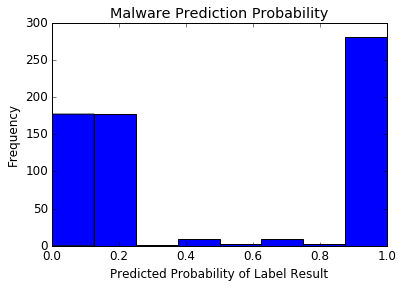

In [36]:
plt.hist(y_pred_proba, bins=8)
plt.xlim(0,1)
plt.title('Malware Prediction Probability')
plt.xlabel('Predicted Probability of Label Result')
plt.ylabel('Frequency')

## Decrease the threshold value to increase sensitivity of the classifier

In [37]:
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_proba, 0.4)
# Set the threshold value to 0.4

In [38]:
y_pred_proba[0:30]

array([ 0.98928246,  0.22344143,  0.01039258,  0.22344143,  0.0103934 ,
        0.68176216,  0.22344143,  0.22344143,  0.0103934 ,  0.22344143,
        0.88857259,  0.99998359,  0.0103934 ,  0.88856665,  0.89763075,
        0.9954821 ,  0.99548143,  0.0103934 ,  0.99548211,  0.0103934 ,
        0.01039258,  0.0103934 ,  0.01039325,  0.88857324,  0.01039315,
        0.96527892,  0.01039325,  0.88857519,  0.01039325,  0.22343191])

In [40]:
y_pred_class
print confusion_matrics

[[326  21]
 [ 40 271]]


In [42]:
#print metrics.confusion_matrix(y_test, y_pred_class)

# ROC Curve and AUC Curve

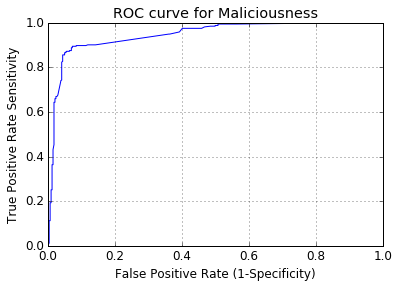

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.title('ROC curve for Maliciousness')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate Sensitivity')
plt.grid(True)

# AUC

In [44]:
print metrics.roc_auc_score(y_test,y_pred_proba)

0.945416384814


In [48]:
test_case = [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0]
svc.predict(test_case)

array([1], dtype=int64)

# F1 Score

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict, average=None)

array([ 0.914446  ,  0.89883914])